## Problem Statement 4

#### Since the company also wants to start their operations in India, they want you to do a Sentiment analysis(Positive or Negative) of their competitors such as:

#### 1. Amazon India
#### 2. Flipkart
#### 3. Snapdeal

In [1]:
pwd

'C:\\Users\\BLAZIN\\Python Projects\\Customer Analytics'

In [2]:
# Change the path
import os
os.chdir('E:\\IMS Course Content\\Course Content\\Data Science Term 3\\Project')

In [3]:
pwd

'E:\\IMS Course Content\\Course Content\\Data Science Term 3\\Project'

In [10]:
#load the packages
import tweepy
import json

In [5]:
#Set the token keys and consumer key in the twitter Dev API
access_token = "111245173-6mTm9zqTAA0KvzvxILqmyGzHUnBMjqfLdT6kdk4N"
access_token_secret = "6fjad1RZM7tYhT64WmLxTbGLWXDqOfZwJj08gHtM4Dt6a"

consumer_key = "zB83IyC9QLcfKuL9vW87VVGa9"
consumer_key_secret = "XkDyvxolgcfWSNvKqL6sVPCrwbtHpjdyT2InVfR0MFoTguy5z3"

In [6]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)

In [7]:
api = tweepy.API(auth)

In [8]:
user = api.me()
print(user.name)

Blesson Inba Densil


##### Textblob

###### Step 1 - Tokenization - create a bag of words
###### Step 2 - Lemmatization/Stemming - Shorten words to their root stem - eg removes ing, ion, etc
###### Step 3 - Lowercasing words
###### Step 4 - Cleaning the data - Remove special characters
###### Step 5 - Remove stop words, punctuation, or unwanted tokens eg The, was , and
###### Step 6 - Classification to Pos(+1), Neg(-1), Neut(0)

##### Polarity

###### It simply means emotions expressed in a sentence.

###### Emotions are closely related to sentiments. The strength of a sentiment or opinion is typically linked to the intensity of certain emotions, e.g., joy and anger.

##### Subjectivity

###### Subjective sentence expresses some personal feelings, views, or beliefs.

In [12]:
from textblob import TextBlob

In [13]:
#Negative sentiment score
a = TextBlob("I am the worst programmer ever")
a.sentiment

Sentiment(polarity=-1.0, subjectivity=1.0)

In [14]:
#Positive Sentiment score
a = TextBlob("I am the best programmer ever")
a.sentiment

Sentiment(polarity=1.0, subjectivity=0.3)

In [15]:
#Neutral Sentiment Score
a = TextBlob("I am programmer")
a.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

#### Extracting the sentiment analysis for Amazon

In [16]:
from textblob import TextBlob
import csv

In [17]:
#Function percentage
def percentage(part, whole):
    return 100 * float(part)/float(whole)

In [38]:
# 1000 tweets to be extracted 
number_of_tweets=1000
search_term='flipkart'

In [39]:
#Creating a cursor for the tweets
tweets = tweepy.Cursor(api.search, q=search_term, lang="en").items(number_of_tweets)

In [40]:
#Initialize the sentiment variables
polarity = 0
positive = 0
negative = 0
neutral = 0
twt = ""

In [41]:
#For each tweet find the sentiment
for tweet in tweets:
    #Append to temp so that we can store in csv later. I use encode UTF-8
    analysis = TextBlob(tweet.text)
    polarity += analysis.sentiment.polarity
    
    # adding reaction of how people are reacting to find average later    
    if (analysis.sentiment.polarity == 0):  
        neutral += 1
    elif (analysis.sentiment.polarity > 0.00):
        positive += 1
    elif (analysis.sentiment.polarity < 0.00):
        negative += 1

In [42]:
#Percentage of the Tweet Sentiment
positive = percentage(positive, number_of_tweets)
negative = percentage(negative, number_of_tweets)
neutral = percentage(neutral, number_of_tweets)

In [43]:
#Polarity
polarity = polarity / number_of_tweets
print(polarity)

0.10583996155753955


In [44]:
#Report
print("How people are reacting on " + search_term + " by analyzing " + str(number_of_tweets) + " Tweets.")

print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0.00):
    print("Positive")
elif (polarity < 0.00):
    print("Negative")

print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(negative) + "% people thought it was negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on flipkart by analyzing 1000 Tweets.
General Report: 
Positive

Detailed Report: 
41.2% people thought it was positive
11.7% people thought it was negative
47.1% people thought it was neutral


In [45]:
import matplotlib.pyplot as plt

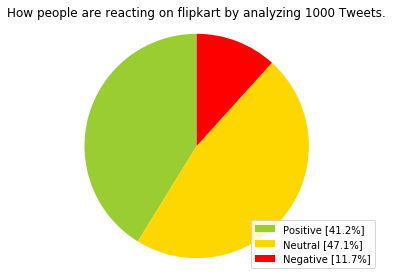

In [46]:
#Plot the Sentiment of the tweets
labels = ['Positive [' + str(positive) + '%]', 'Neutral [' + str(neutral) + '%]', 
          'Negative [' + str(negative) + '%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('How people are reacting on ' + search_term + ' by analyzing ' + str(number_of_tweets) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Word Cloud

In [47]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
from os import path

In [48]:
currdir = path.dirname("E:\\IMS Course Content\\Course Content\\Data Science Term 3\\Project\\")
# create numpy araay for wordcloud mask image
mask = np.array(Image.open(path.join(currdir, "cloud.png")))

In [49]:
# create set of stopwords
stopwords = set(STOPWORDS)

In [50]:
wc = WordCloud(background_color="white", max_words=200, mask=mask, stopwords=stopwords)

In [51]:
wc.generate(tweetText)

ValueError: We need at least 1 word to plot a word cloud, got 0.

In [52]:
wc.to_file(path.join(currdir, "wc.png"))

ValueError: WordCloud has not been calculated, call generate first.

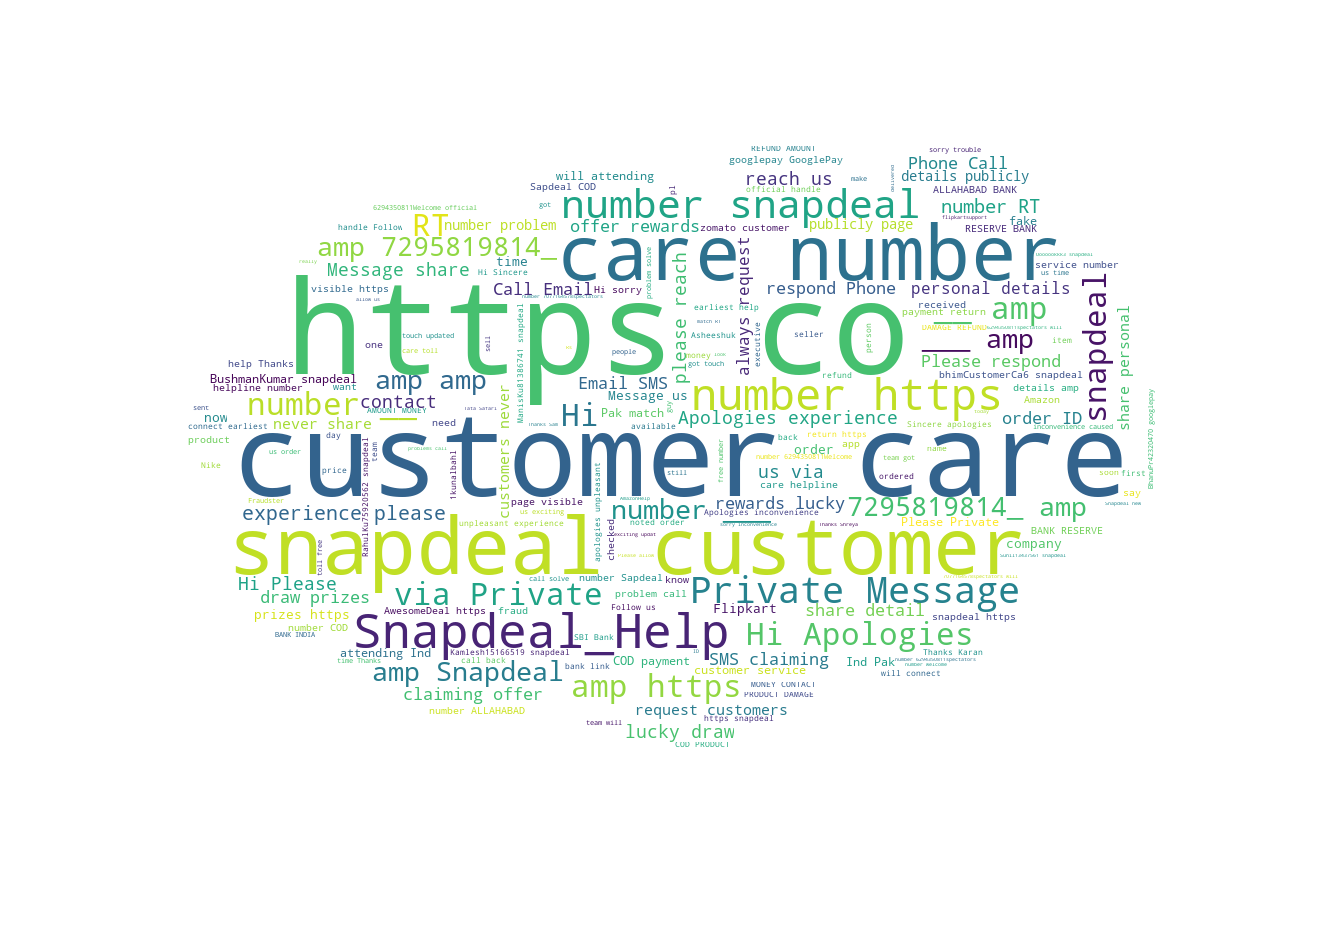

In [53]:
from IPython.display import Image
Image(filename='E:\\IMS Course Content\\Course Content\\Data Science Term 3\\Project\\wc.png') 